In [2]:
#Install the needed packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load the data
NBA19 = pd.read_excel("NBA2019odds.xlsx")
NBA19

,team,opponent,day,month,year,winodds,loseodds,teampts,oppopts,overtime,home,Game(home-away),HAscore,win
0,Atlanta Hawks,New York Knicks,18,10,2018,2.39,1.60,107,126,0,0,New York Knicks - Atlanta Hawks,126:107,0
1,Atlanta Hawks,Memphis Grizzlies,20,10,2018,3.34,1.34,117,131,0,0,Memphis Grizzlies - Atlanta Hawks,131:117,0
2,Atlanta Hawks,Cleveland Cavaliers,22,10,2018,3.97,1.26,133,111,0,0,Cleveland Cavaliers - Atlanta Hawks,111:133,1
3,Atlanta Hawks,Dallas Mavericks,25,10,2018,2.07,1.79,111,104,0,1,Atlanta Hawks - Dallas Mavericks,111:104,1
4,Atlanta Hawks,Chicago Bulls,28,10,2018,1.43,2.91,85,97,0,1,Atlanta Hawks - Chicago Bulls,85:97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,Washington Wizards,Denver Nuggets,1,4,2019,5.68,1.15,95,90,0,0,Denver Nuggets - Washington Wizards,90:95,1
2456,Washington Wizards,Chicago Bulls,4,4,2019,1.19,5.00,114,115,0,1,Washington Wizards - Chicago Bulls,114:115,0
2457,Washington Wizards,San Antonio Spurs,6,4,2019,3.22,1.37,112,129,0,1,Washington Wizards - San Antonio Spurs,112:129,0
2458,Washington Wizards,New York Knicks,8,4,2019,1.58,2.44,110,113,0,0,New York Knicks - Washington Wizards,113:110,0


In [7]:
NBA19['winprob'] = 1/(NBA19['winodds'])/(1/(NBA19['winodds'])+ 1/(NBA19['loseodds']))
NBA19.head(10)

,team,opponent,day,month,year,winodds,loseodds,teampts,oppopts,overtime,home,Game(home-away),HAscore,win,winprob
0,Atlanta Hawks,New York Knicks,18,10,2018,2.39,1.60,107,126,0,0,New York Knicks - Atlanta Hawks,126:107,0,0.401003
1,Atlanta Hawks,Memphis Grizzlies,20,10,2018,3.34,1.34,117,131,0,0,Memphis Grizzlies - Atlanta Hawks,131:117,0,0.286325
2,Atlanta Hawks,Cleveland Cavaliers,22,10,2018,3.97,1.26,133,111,0,0,Cleveland Cavaliers - Atlanta Hawks,111:133,1,0.240918
3,Atlanta Hawks,Dallas Mavericks,25,10,2018,2.07,1.79,111,104,0,1,Atlanta Hawks - Dallas Mavericks,111:104,1,0.463731
4,Atlanta Hawks,Chicago Bulls,28,10,2018,1.43,2.91,85,97,0,1,Atlanta Hawks - Chicago Bulls,85:97,0,0.670507
5,Atlanta Hawks,Philadelphia 76ers,30,10,2018,6.71,1.12,92,113,0,0,Philadelphia 76ers - Atlanta Hawks,113:92,0,0.143040
6,Atlanta Hawks,Cleveland Cavaliers,31,10,2018,2.71,1.49,114,136,0,0,Cleveland Cavaliers - Atlanta Hawks,136:114,0,0.354762
7,Atlanta Hawks,Sacramento Kings,2,11,2018,2.16,1.73,115,146,0,1,Atlanta Hawks - Sacramento Kings,115:146,0,0.444730
8,Atlanta Hawks,Miami Heat,4,11,2018,2.91,1.43,123,118,0,1,Atlanta Hawks - Miami Heat,123:118,1,0.329493
9,Atlanta Hawks,Charlotte Hornets,7,11,2018,6.67,1.12,102,113,0,0,Charlotte Hornets - Atlanta Hawks,113:102,0,0.143774


In [8]:
NBAteamprobs = NBA19.groupby('team')[['winprob','win']].sum()
NBAteamprobs

,winprob,win
team,,
Atlanta Hawks,25.721652,29
Boston Celtics,52.017912,49
Brooklyn Nets,36.496643,42
Charlotte Hornets,40.390896,39
Chicago Bulls,25.201456,22
Cleveland Cavaliers,21.085647,19
Dallas Mavericks,35.059912,33
Denver Nuggets,50.487982,54
Detroit Pistons,40.744106,41


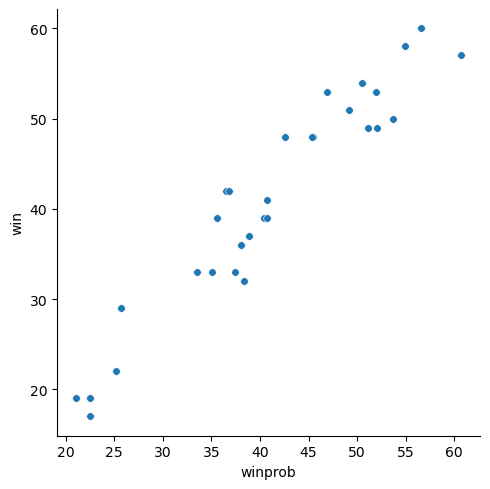

In [9]:
sns.relplot(x="winprob", y="win", data= NBAteamprobs, s=30)

In [10]:
np.corrcoef(NBAteamprobs["winprob"], NBAteamprobs['win'])

array([[1.        , 0.95700262],
       [0.95700262, 1.        ]])

In [12]:
NHL19 = pd.read_excel("NHL2018-19odds.xlsx")
NHL19

,team,opponent,day,month,year,home,winodds,tieodds,loseodds,teamgoals,oppogoals,overtime,pen,win,loss,OTL,game-ht-at,scoreht-at
0,San Jose Sharks,Anaheim Ducks,4,10,2018,1,1.87,4.08,3.50,2,5,0,0,0,1,0,San Jose Sharks - Anaheim Ducks,02:05:00
1,Toronto Maple Leafs,Montreal Canadiens,4,10,2018,1,1.65,4.57,4.21,3,2,1,0,1,0,0,Toronto Maple Leafs - Montreal Canadiens,3:2 ET
2,Vancouver Canucks,Calgary Flames,4,10,2018,1,2.82,4.03,2.17,5,2,0,0,1,0,0,Vancouver Canucks - Calgary Flames,05:02:00
3,Washington Capitals,Boston Bruins,4,10,2018,1,2.32,3.97,2.62,7,0,0,0,1,0,0,Washington Capitals - Boston Bruins,07:00:00
4,Buffalo Sabres,Boston Bruins,5,10,2018,1,2.79,3.98,2.19,0,4,0,0,0,1,0,Buffalo Sabres - Boston Bruins,00:04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2537,Columbus Blue Jackets,Ottawa Senators,7,4,2019,0,1.82,4.29,3.55,6,2,0,0,1,0,0,Ottawa Senators - Columbus Blue Jackets,02:06:00
2538,Carolina Hurricanes,Philadelphia Flyers,7,4,2019,0,2.06,4.26,2.88,4,3,0,0,1,0,0,Philadelphia Flyers - Carolina Hurricanes,03:04:00
2539,New York Rangers,Pittsburgh Penguins,7,4,2019,0,4.95,4.95,1.51,4,3,1,0,1,0,0,Pittsburgh Penguins - New York Rangers,3:4 ET
2540,Colorado Avalanche,San Jose Sharks,7,4,2019,0,3.21,4.21,1.94,2,5,0,0,0,1,0,San Jose Sharks - Colorado Avalanche,05:02:00


In [14]:
NHL19['winprob']= 1/(NHL19['winodds'])/(1/NHL19['winodds'])+ 1/(NHL19['tieodds'])+ 1/(NHL19['loseodds'])
NHL19['tieprob']= 1/(NHL19['tieodds'])/(1/NHL19['winodds'])+ 1/(NHL19['tieodds'])+ 1/(NHL19['loseodds'])
NHL19.head(10)

,team,opponent,day,month,year,home,winodds,tieodds,loseodds,teamgoals,oppogoals,overtime,pen,win,loss,OTL,game-ht-at,scoreht-at,winprob,tieprob
0,San Jose Sharks,Anaheim Ducks,4,10,2018,1,1.87,4.08,3.50,2,5,0,0,0,1,0,San Jose Sharks - Anaheim Ducks,02:05:00,1.530812,0.989146
1,Toronto Maple Leafs,Montreal Canadiens,4,10,2018,1,1.65,4.57,4.21,3,2,1,0,1,0,0,Toronto Maple Leafs - Montreal Canadiens,3:2 ET,1.456348,0.817398
2,Vancouver Canucks,Calgary Flames,4,10,2018,1,2.82,4.03,2.17,5,2,0,0,1,0,0,Vancouver Canucks - Calgary Flames,05:02:00,1.708968,1.408720
3,Washington Capitals,Boston Bruins,4,10,2018,1,2.32,3.97,2.62,7,0,0,0,1,0,0,Washington Capitals - Boston Bruins,07:00:00,1.633569,1.217951
4,Buffalo Sabres,Boston Bruins,5,10,2018,1,2.79,3.98,2.19,0,4,0,0,0,1,0,Buffalo Sabres - Boston Bruins,00:04:00,1.707877,1.408882
5,Carolina Hurricanes,New York Islanders,5,10,2018,1,1.97,4.18,3.11,1,2,1,0,0,0,1,Carolina Hurricanes - New York Islanders,1:2 ET,1.560778,1.032070
6,Colorado Avalanche,Minnesota Wild,5,10,2018,1,2.42,3.93,2.48,4,1,0,0,1,0,0,Colorado Avalanche - Minnesota Wild,04:01:00,1.657679,1.273455
7,Dallas Stars,Arizona Coyotes,5,10,2018,1,1.84,4.18,3.49,3,0,0,0,1,0,0,Dallas Stars - Arizona Coyotes,03:00:00,1.525767,0.965959
8,Detroit Red Wings,Columbus Blue Jackets,5,10,2018,1,2.84,4.03,2.13,2,3,1,0,0,0,1,Detroit Red Wings - Columbus Blue Jackets,2:3 ET,1.717623,1.422337
9,New York Rangers,Nashville Predators,5,10,2018,1,3.10,4.05,2.00,2,3,0,0,0,1,0,New York Rangers - Nashville Predators,02:03:00,1.746914,1.512346


In [16]:
NHL19['pts']=2*NHL19['win'] + NHL19['OTL']

In [17]:
NHL19['Epts']= 2*NHL19['winprob']+ NHL19['tieprob']

In [18]:
NHLteamprobs=NHL19.groupby('team')[['Epts','pts']].sum()
NHLteamprobs

,Epts,pts
team,,
Anaheim Ducks,398.713201,80
Arizona Coyotes,394.786521,86
Boston Bruins,351.772209,107
Buffalo Sabres,394.071890,76
Calgary Flames,352.194691,107
Carolina Hurricanes,362.407864,99
Chicago Blackhawks,393.527772,84
Colorado Avalanche,369.826319,90
Columbus Blue Jackets,359.525549,98


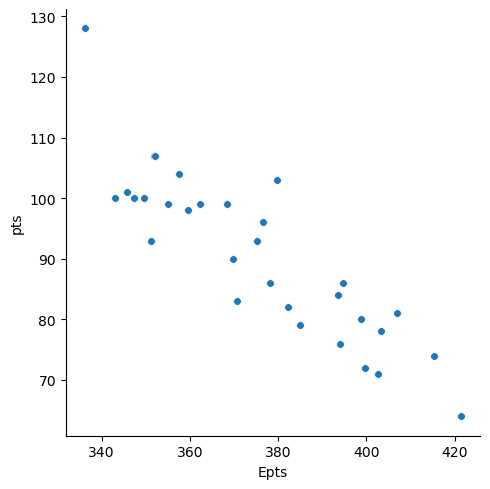

In [20]:
sns.relplot(x="Epts", y="pts", data = NHLteamprobs, s=30)

In [21]:
np.corrcoef(NHLteamprobs["Epts"], NHLteamprobs['pts'])

array([[ 1.        , -0.88100258],
       [-0.88100258,  1.        ]])

In [22]:
IPL18 = pd.read_excel("IPL2018odds.xlsx")
IPL18

,date,team,oppo,home,teamwinodds,oppowinodds,teamscore,opposcore,teamwin,playoff,DLS result,home-away teams,score
0,2018-04-07 00:00:00,Chennai Super Kings,Mumbai Indians,0,104,-130,169,165,1,0,0,Mumbai Indians - Chennai Super Kings,165:169
1,2018-04-08 00:00:00,Kings XI Punjab,Delhi Capitals,0,-143,114,167,166,1,0,0,Delhi Capitals - Kings XI Punjab,166:167
2,2018-04-08 00:00:00,Royal Challengers Bangalore,Kolkata Knight Riders,0,-143,114,176,177,0,0,0,Kolkata Knight Riders - Royal Challengers Bang...,177:176
3,2018-04-09 00:00:00,Rajasthan Royals,Sunrisers Hyderabad,0,144,-179,125,127,0,0,0,Sunrisers Hyderabad - Rajasthan Royals,127:125
4,2018-04-10 00:00:00,Kolkata Knight Riders,Chennai Super Kings,0,-104,-118,202,205,0,0,0,Chennai Super Kings - Kolkata Knight Riders,205:202
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2018-05-20 00:00:00,Delhi Capitals,Mumbai Indians,1,167,-213,174,163,1,0,0,Delhi Capitals - Mumbai Indians,174:163
116,22/5/2018,Sunrisers Hyderabad,Chennai Super Kings,1,121,-149,139,140,0,1,0,Sunrisers Hyderabad - Chennai Super Kings,139:140
117,23/5/2018,Kolkata Knight Riders,Rajasthan Royals,1,-192,154,169,144,1,1,0,Kolkata Knight Riders - Rajasthan Royals,169:144
118,25/5/2018,Kolkata Knight Riders,Sunrisers Hyderabad,1,-156,125,161,174,0,1,0,Kolkata Knight Riders - Sunrisers Hyderabad,161:174


In [25]:
IPL18['winprobX'] = np.where(IPL18['teamwinodds']>0, 100/(100+IPL18['teamwinodds']),\
    -IPL18['teamwinodds']/(100-IPL18['teamwinodds']))
IPL18['loseprobX'] = np.where(IPL18['oppowinodds']>0, 100/(100+IPL18['oppowinodds']),\
    -IPL18['oppowinodds']/(100-IPL18['oppowinodds']))

IPL18['winprob']= IPL18['winprobX']/(IPL18['winprobX']+IPL18['loseprobX'])

IPL18

,date,team,oppo,home,teamwinodds,oppowinodds,teamscore,opposcore,teamwin,playoff,DLS result,home-away teams,score,winprobX,loseprobX,winprob
0,2018-04-07 00:00:00,Chennai Super Kings,Mumbai Indians,0,104,-130,169,165,1,0,0,Mumbai Indians - Chennai Super Kings,165:169,0.490196,0.565217,0.464459
1,2018-04-08 00:00:00,Kings XI Punjab,Delhi Capitals,0,-143,114,167,166,1,0,0,Delhi Capitals - Kings XI Punjab,166:167,0.588477,0.467290,0.557393
2,2018-04-08 00:00:00,Royal Challengers Bangalore,Kolkata Knight Riders,0,-143,114,176,177,0,0,0,Kolkata Knight Riders - Royal Challengers Bang...,177:176,0.588477,0.467290,0.557393
3,2018-04-09 00:00:00,Rajasthan Royals,Sunrisers Hyderabad,0,144,-179,125,127,0,0,0,Sunrisers Hyderabad - Rajasthan Royals,127:125,0.409836,0.641577,0.389795
4,2018-04-10 00:00:00,Kolkata Knight Riders,Chennai Super Kings,0,-104,-118,202,205,0,0,0,Chennai Super Kings - Kolkata Knight Riders,205:202,0.509804,0.541284,0.485025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2018-05-20 00:00:00,Delhi Capitals,Mumbai Indians,1,167,-213,174,163,1,0,0,Delhi Capitals - Mumbai Indians,174:163,0.374532,0.680511,0.354992
116,22/5/2018,Sunrisers Hyderabad,Chennai Super Kings,1,121,-149,139,140,0,1,0,Sunrisers Hyderabad - Chennai Super Kings,139:140,0.452489,0.598394,0.430580
117,23/5/2018,Kolkata Knight Riders,Rajasthan Royals,1,-192,154,169,144,1,1,0,Kolkata Knight Riders - Rajasthan Royals,169:144,0.657534,0.393701,0.625487
118,25/5/2018,Kolkata Knight Riders,Sunrisers Hyderabad,1,-156,125,161,174,0,1,0,Kolkata Knight Riders - Sunrisers Hyderabad,161:174,0.609375,0.444444,0.578254


In [27]:
IPLteamprobs=IPL18.groupby('team')[['winprob','teamwin']].mean()
IPLteamprobs

,winprob,teamwin
team,,
Chennai Super Kings,0.523728,0.687500
Delhi Capitals,0.438062,0.357143
Kings XI Punjab,0.505387,0.428571
Kolkata Knight Riders,0.550237,0.562500
Mumbai Indians,0.542455,0.428571
Rajasthan Royals,0.407361,0.466667
Royal Challengers Bangalore,0.552693,0.428571
Sunrisers Hyderabad,0.480340,0.588235


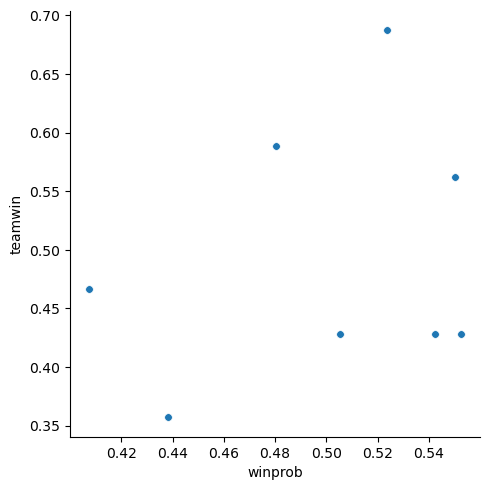

In [28]:
sns.relplot(x="winprob", y="teamwin", data = IPLteamprobs, s=30)

In [29]:
np.corrcoef(IPLteamprobs["winprob"], IPLteamprobs['teamwin'])

array([[1.        , 0.25673363],
       [0.25673363, 1.        ]])